<a href="https://colab.research.google.com/github/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 18

#Today's Topics

1. Classical Q-Learning
2. DQN (Deep Q-learning)

# Introduction

Q-learning (Quality learning) is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free"), and it can handle problems with stochastic transitions and rewards without requiring adaptations.

For any finite Markov decision process (FMDP), Q-learning finds an optimal policy in the sense of maximizing the expected value of the total reward over any and all successive steps, starting from the current state.[1] Q-learning can identify an optimal action-selection policy for any given FMDP, given infinite exploration time and a partly-random policy.

# Frozen Lake Example
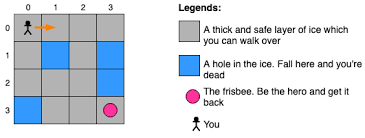

# Q-Learning Table

We create a matrix, “Q” also called as Q-table, which is the brain of our agent. If an environment has a discrete state space and discrete set of actions, it is possible to create a grid that matches all possible actions at all possible states. 

The matrix Q is initialized to zero, as agent starts out knowing nothing. It updates Q-table with new values for state-action pair, as it learns. The Agent explores different ‘state-action’ combinations till it reaches the goal or falls into the hole. We will call each of this explorations an episode. Each time the agent arrives at goal or is terminated, we start with next episode.

This [Article](https://towardsdatascience.com/practical-reinforcement-learning-02-getting-started-with-q-learning-582f63e4acd9) demonstrates how a Q-table is updated.

## Training Process

Agents perform actions in time steps $t,t=1,t=2...$ and choose the best action in the current state to get the best reward in the next state. The update/training process:





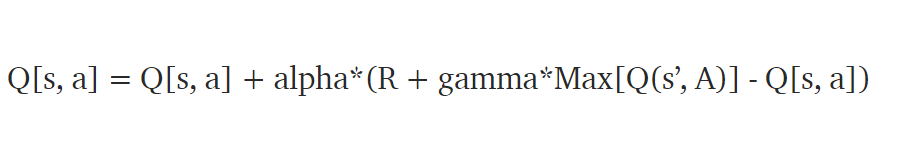

We are mapping, actions and states via the q-function. After some training process we can look up the best action given a space with the highest expected reward. It has been proven that discrete actions and state spaces actually converge.

# Exploitation Vs. Exploration

As agent begins the learning, we would want it to take random actions to explore more paths. But as the agent gets better, the Q-function converges to more consistent Q-values. Now we would like our agent to exploit paths with highest Q-value i.e takes greedy actions. This is where epsilon comes in.

Exploitation:Exploit what we know? Can lead to getting higher rewards.

Exploration: Random choice/explore new options? Can lead to getting better path.

We want to learn the best way to win, hence we define something called $\epsilon$.The decay of $\epsilon$ is a strategy that impacts the overall learning process e.g. a slower decay means slower learninf(because more random choices).

The agent takes random actions for probability $\epsilon$ and greedy action for probability (1-$\epsilon$).

From our example of the frozen lake, we can either choose the action for the maximum Q-value or choose any other action when in that particular state, time-to-time to facilitate random choice. With a decaying $\epsilon$, this tendency to choose random actions will go down eventually leading to picking the maximum Q-value.

Google DeepMind used a decaying $\epsilon$-greedy action selection. Where $\epsilon$ decays over time from 1 to 0.1 — in the beginning, the system makes completely random moves to explore the state space maximally, and then it settles down to a fixed exploration rate.

Overall, this mechanism helps to learn instad of stopping the very first time the agent gets a reward.

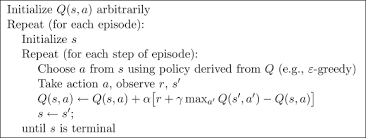

# Deep Q-learning

## Key Ideas:

1. Focus on a Policy that uses Neural network
2. Tabular form of describing a policy is not scalable
3. Real world problems are continuous
4. Apply deep-learning to deal with limitations of tabular methods.
5. Large tables will lead to complex mapping and the agent has to visit all states to update policy.
6. Using Neural Networks, we can estimate values or policies for states the agent has not visited yet.

We assume states with similar obseravtions have similar values (Bellman equation)

# Value and Policy network

The value network assigns value/score to the state of the game by calculating an expected cumulative score for the current state s . Every state goes through the value network. The states which gets more reward obviously get more value in the network.

Key idea:
1. When 2 states are similar, their values must be similar.
2. Similarity can be decided by the NN based on observation inputs.
3. Once the network has output for some states, it can take observations from completely unseen states and output a value based on similar historic observations.
4. This is similar to how humans interact with situations (knowledge from the past)

We still need to decide how to take actions. Another neural network is created for a policy using which we can take actions.

Advantages of 2 NNs: 

1. Output layer works well with the idea of a stochastic policy.
2. Exploration vs. Exploitation trade-off handled well.
3. No need to visit every state because NN will tend to learn a stochastic policy given similar observations.

Important Issues to address:
1. How is the agent related to these networks (Agent feedback should impact the process)
2. How do we update weights of these networks?
3. How to connect these 2 networks?


[Source](https://towardsdatascience.com/policy-networks-vs-value-networks-in-reinforcement-learning-da2776056ad2)



# Q-Network

We reframe RL problem as a supervised learning problem.

Bellman Equation used for the value network. Its a basis for the error metric.
values are learnt from observations.

For the Policy NN we create a dataset by mapping a potential path. This is called the Target network.

# Experience Replay

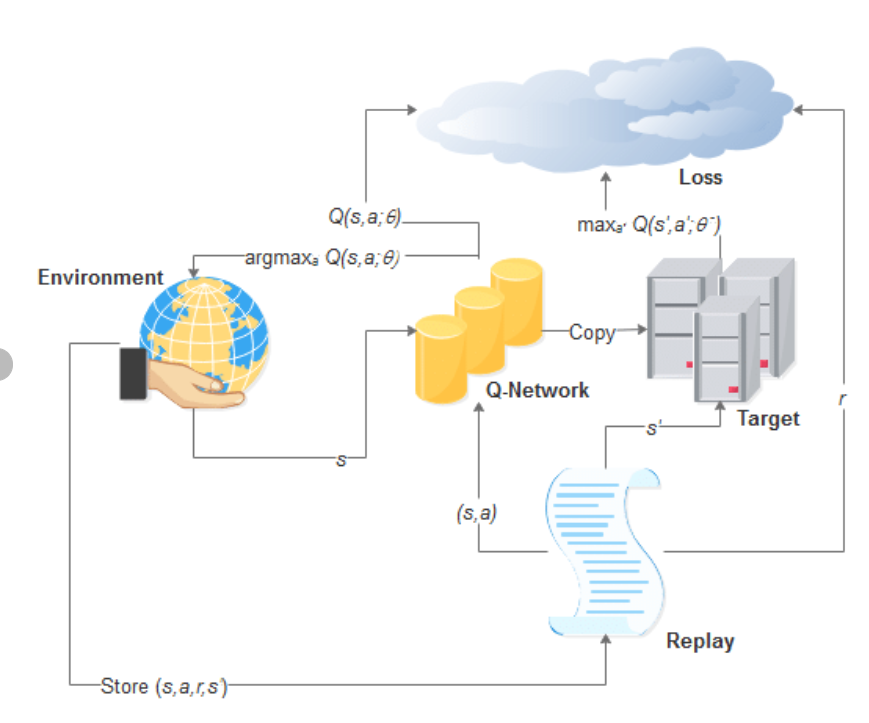

# References:
[Article 1](https://en.wikipedia.org/wiki/Q-learning)

[Article 2](https://reinforcement-learning4.fun/2019/06/09/introduction-reinforcement-learning-frozen-lake-example/)